# Getting Started

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('data/hepatitis.csv')
data.shape

(155, 20)

In [4]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [5]:
data['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

# Preprocessing

In [6]:
def preprocess_inputs(df, drop_protime=False):
    df = df.copy()
    
    # Identify the continuous numeric features
    continuous_features = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
    
    # Fill missing values
    for column in continuous_features:
        df[column] = df[column].fillna(df[column].mean())
    
    for column in df.columns.drop(continuous_features):
        df[column] = df[column].fillna(df[column].mode().sample(1, random_state=1).values[0])
    
    # Convert the booleans columns into integer columns
        for column in df.select_dtypes('bool'):
            df[column] = df[column].astype(np.int)
    
    # Encode the sex column as a binary feature
    df['sex'] = df['sex'].replace({
        'female': 0,
        'male': 1
    })
    
    # Shuffle the data
    df = df.sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    # Change label name
    df = df.rename(columns={'class': 'label'})
    
    # Drop protime
    if drop_protime == True:
        df = df.drop('protime', axis=1)
    
    # Split df into X and y
    y = df['label'].map({'die':0, 'live':1})
    X = df.drop('label', axis=1)
    
    return X, y

In [ ]:
X, y = preprocess_inputs(data, drop_protime=True)

# Training

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [60]:
def model(model, x_train, x_test, y_train, y_test, title):
    clf = model()
    # train model
    clf.fit(x_train, y_train)
    clf_pred = clf.predict(x_test)
    # accuracy
    clf_acc = accuracy_score(y_test, clf_pred)
    print(f'Accuracy: {round(clf_acc, 1)}')
    # precision
    clf_pre = precision_score(y_test, clf_pred)
    print(f'Accuracy: {round(clf_pre, 1)}')
    # precision
    clf_rec = recall_score(y_test, clf_pred)
    print(f'Accuracy: {round(clf_rec, 1)}')


    print('------------Report------------')
    print(classification_report(y_test, clf_pred))

    # The AUC
    probs = clf.predict_proba(x_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    plt.figure(2)
    roc_auc = auc(fpr, tpr)
    plt.title(f'{title} AUC Curve')
    plt.plot(fpr, tpr, 'b', label=f'AUC of {clf} = {roc_auc}')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([0, 1])
    plt.xlabel('True Positive')
    plt.ylabel('False Positive')
    plt.show()
    
    cnf = confusion_matrix(y_test, clf_pred)
    sns.heatmap(cnf, cmap='coolwarm_r', annot=True, linewidths=0.5, fmt='g')
    plt.title(f'{title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return clf_acc, clf_pre, clf_rec

    
    

Accuracy: 0.9
Accuracy: 0.9
Accuracy: 0.9
------------Report------------
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.90      0.95      0.92        37

    accuracy                           0.87        47
   macro avg       0.82      0.77      0.79        47
weighted avg       0.87      0.87      0.87        47



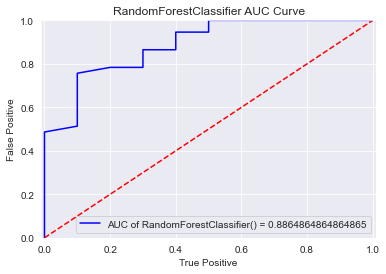

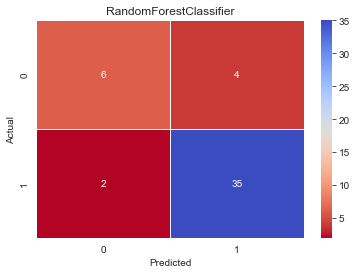

In [61]:
rfc_acc, rfc_pre, rfc_rec = model(RandomForestClassifier, X_train, X_test, y_train, y_test, 'RandomForestClassifier')


Accuracy: 0.9
Accuracy: 0.9
Accuracy: 1.0
------------Report------------
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.92      0.97      0.95        37

    accuracy                           0.91        47
   macro avg       0.90      0.84      0.86        47
weighted avg       0.91      0.91      0.91        47



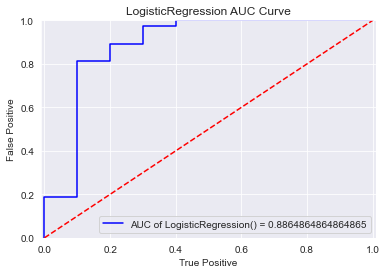

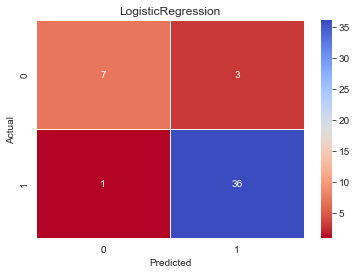

In [62]:
lr_acc, lr_pre, lr_rec = model(LogisticRegression, X_train, X_test, y_train, y_test, 'LogisticRegression')

Accuracy: 0.8
Accuracy: 0.9
Accuracy: 0.8
------------Report------------
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.86      0.84      0.85        37

    accuracy                           0.77        47
   macro avg       0.66      0.67      0.66        47
weighted avg       0.77      0.77      0.77        47



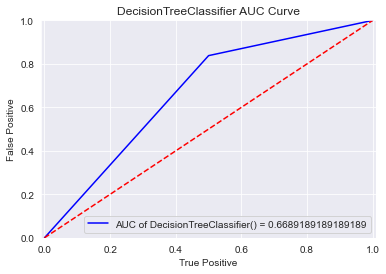

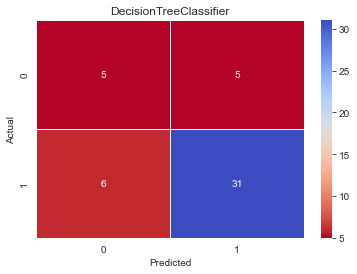

In [63]:
dtc_acc, dtc_pre, dtc_rec = model(DecisionTreeClassifier, X_train, X_test, y_train, y_test, 'DecisionTreeClassifier')

Accuracy: 0.9
Accuracy: 0.9
Accuracy: 0.9
------------Report------------
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.88      0.95      0.91        37

    accuracy                           0.85        47
   macro avg       0.79      0.72      0.75        47
weighted avg       0.84      0.85      0.84        47



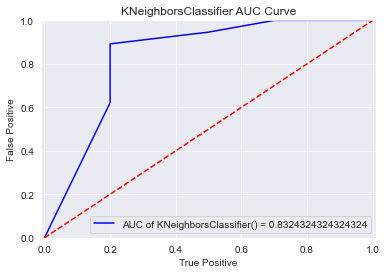

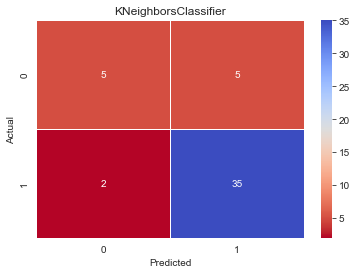

In [64]:
knn_acc, knn_pre, knn_rec = model(KNeighborsClassifier, X_train, X_test, y_train, y_test, 'KNeighborsClassifier')

In [65]:
results = pd.DataFrame()
results['Machine Learning Algorithms'] = ['Random Forest Classifier', 'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier']
results['Accuracy'] = [round(rfc_acc, 2),round (lr_acc, 2), round(dtc_acc, 2), round(knn_acc, 2)]
results['Precision'] = [round(rfc_pre, 2),round (lr_pre, 2), round(dtc_pre, 2), round(knn_pre, 2)]
results['Recall'] = [round(rfc_rec, 2),round (lr_rec, 2), round(dtc_rec, 2), round(knn_rec, 2)]
results

,Machine Learning Algorithms,Accuracy,Precision,Recall
0,Random Forest Classifier,0.87,0.90,0.95
1,LogisticRegression,0.91,0.92,0.97
2,DecisionTreeClassifier,0.77,0.86,0.84
3,KNeighborsClassifier,0.85,0.88,0.95


## Balancing the Dataset with Smote Over-Sampling

In [66]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE()
X_smote, y_smote = smote_sample.fit_resample(X, y)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

1    123
0    123
Name: label, dtype: int64

In [67]:
# train test
# Train-test split
Smote_X_train, Smote_X_test, Smote_y_train, Smote_y_test = train_test_split(X_smote, y_smote, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(Smote_X_train)
Smote_X_train = pd.DataFrame(scaler.transform(Smote_X_train), index=Smote_X_train.index, columns=Smote_X_train.columns)
Smote_X_test = pd.DataFrame(scaler.transform(Smote_X_test), index=Smote_X_test.index, columns=Smote_X_test.columns)

Accuracy: 0.9
Accuracy: 0.9
Accuracy: 0.9
------------Report------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.94      0.91      0.93        34

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



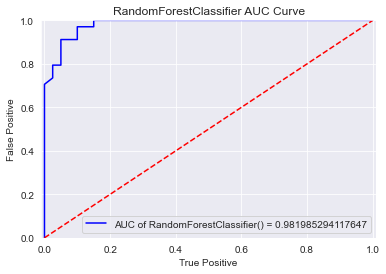

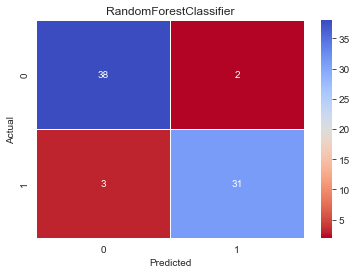

In [69]:
Smote_rfc_acc, Smote_rfc_pre, Smote_rfc_rec = model(RandomForestClassifier, Smote_X_train, Smote_X_test, Smote_y_train, Smote_y_test, 'RandomForestClassifier')


Accuracy: 0.9
Accuracy: 0.8
Accuracy: 0.9
------------Report------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.84      0.91      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



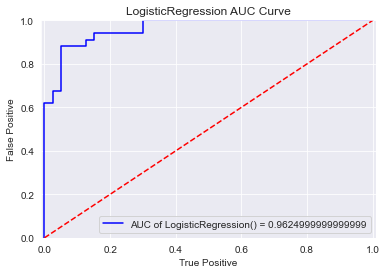

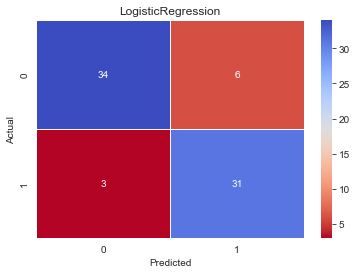

In [70]:
Smote_lr_acc, Smote_lr_pre, Smote_lr_rec = model(LogisticRegression, Smote_X_train, Smote_X_test, Smote_y_train, Smote_y_test, 'LogisticRegression')

Accuracy: 0.9
Accuracy: 0.9
Accuracy: 0.8
------------Report------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.87      0.79      0.83        34

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



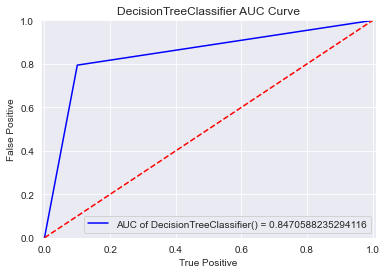

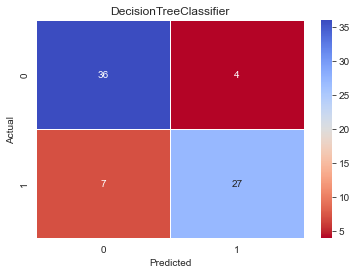

In [71]:
Smote_dtc_acc, Smote_dtc_pre, Smote_dtc_rec = model(DecisionTreeClassifier, Smote_X_train, Smote_X_test, Smote_y_train, Smote_y_test, 'DecisionTreeClassifier')

Accuracy: 0.9
Accuracy: 1.0
Accuracy: 0.8
------------Report------------
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.96      0.79      0.87        34

    accuracy                           0.89        74
   macro avg       0.91      0.88      0.89        74
weighted avg       0.90      0.89      0.89        74



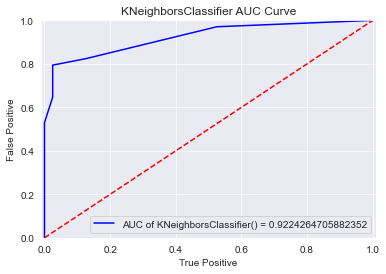

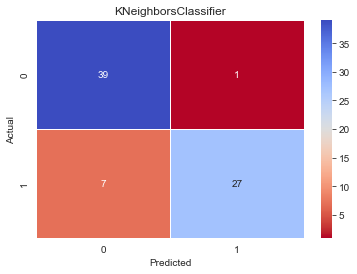

In [72]:
Smote_knn_acc, Smote_knn_pre, Smote_knn_rec = model(KNeighborsClassifier, Smote_X_train, Smote_X_test, Smote_y_train, Smote_y_test, 'KNeighborsClassifier')

In [74]:
Smote_results = pd.DataFrame()
Smote_results['Machine Learning Algorithms'] = ['Random Forest Classifier', 'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier']
Smote_results['Accuracy'] = [round(Smote_rfc_acc, 2),round (Smote_lr_acc, 2), round(Smote_dtc_acc, 2), round(Smote_knn_acc, 2)]
Smote_results['Precision'] = [round(Smote_rfc_pre, 2),round (Smote_lr_pre, 2), round(Smote_dtc_pre, 2), round(Smote_knn_pre, 2)]
Smote_results['Recall'] = [round(Smote_rfc_rec, 2),round (Smote_lr_rec, 2), round(Smote_dtc_rec, 2), round(Smote_knn_rec, 2)]
Smote_results

,Machine Learning Algorithms,Accuracy,Precision,Recall
0,Random Forest Classifier,0.93,0.94,0.91
1,LogisticRegression,0.88,0.84,0.91
2,DecisionTreeClassifier,0.85,0.87,0.79
3,KNeighborsClassifier,0.89,0.96,0.79
